In [1]:
# Set module import path (cus we are running the script as a module)

import sys
import pathlib
nb_dir = "/Users/gregruyoga/G_PROJECTS/my-first-GAN"
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [58]:
from lightning.source.datamodules import *
from PIL import Image
import torchvision.transforms as T
import torch.nn as nn
import torch

In [48]:
############ Utility Shizzles ############

def show_image(image):   
    if image.requires_grad:
        image = image.detach()
        plt.imshow(np.transpose(image.cpu().numpy(), (1,2,0)))

In [4]:
Datamodule = WaifuDatamodule(folderpath="/Users/gregruyoga/G_PROJECTS/img_database/waifu", transforms=None)

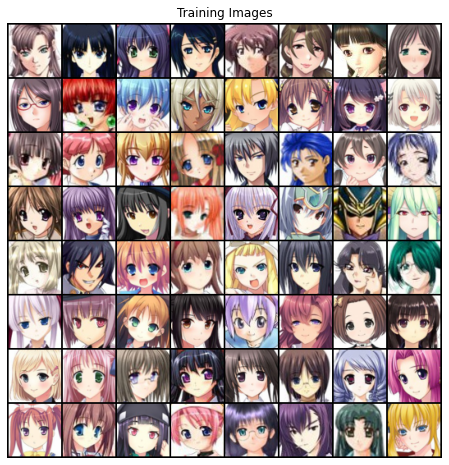

In [5]:
Datamodule.preview_batch()

In [6]:
batch = Datamodule.get_batch()
images, _ = batch

In [9]:
image = images[0]

## Conv2d Formula

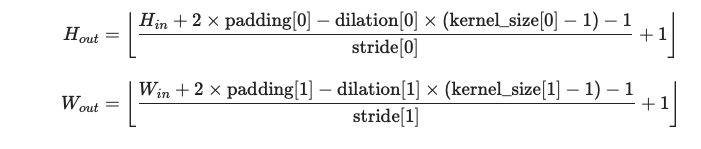

In [82]:
featuremap_dim = 8

FullDiscriminator = nn.Sequential(
            nn.Conv2d(3, featuremap_dim, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(),

            nn.Conv2d(featuremap_dim, featuremap_dim * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(featuremap_dim * 2),
            nn.LeakyReLU(),

            nn.Conv2d(featuremap_dim * 2, featuremap_dim * 4, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(featuremap_dim * 4),
            nn.LeakyReLU(),

            nn.Conv2d(featuremap_dim * 4, featuremap_dim * 8, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(featuremap_dim * 8),
            nn.LeakyReLU(),

            nn.Conv2d(featuremap_dim * 8, 1, kernel_size=4, stride=1, padding=0, bias=False),
            nn.Sigmoid(),
)

In [81]:
image = FullDiscriminator(images)[0]
image.size()

torch.Size([1, 1, 1])

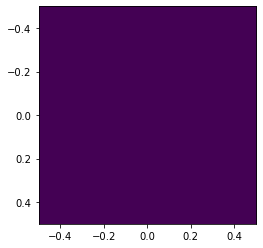

In [79]:
show_image(image)

In [47]:
image.requires_grad

True